<a href="https://colab.research.google.com/github/benigmatic/Quantum-circuits/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from qiskit import *

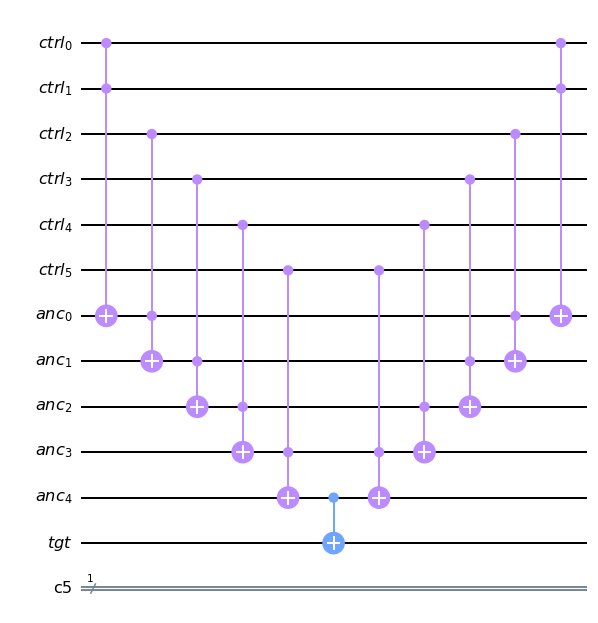

In [ ]:
# 6-qubit controlled quantum circuit with 5 ancilla qubits and one target qubit
import qiskit.quantum_info as qi

ctrl = QuantumRegister(6, 'ctrl')
anc = QuantumRegister(5, 'anc')
tgt = QuantumRegister(1, 'tgt')
cr = ClassicalRegister(1)
circuit = QuantumCircuit(ctrl, anc, tgt,cr)


circuit.ccx(0,1,6)
circuit.ccx(2,6,7)
circuit.ccx(3,7,8)
circuit.ccx(4,8,9)
circuit.ccx(5,9,10)
circuit.cx(10,11)
circuit.ccx(5,9,10)
circuit.ccx(4,8,9)
circuit.ccx(3,7,8)
circuit.ccx(2,6,7)
circuit.ccx(0,1,6)


circuit.draw(output="mpl")

In [ ]:
import numpy as np
matrix = qi.Operator(circuit)
print(matrix.data)

[[1.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 1.+0.j]]


In [ ]:
import numpy as np

np_matrix = np.array(matrix,dtype="int32")
print(np_matrix)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
circuit.measure(tgt,cr)
#Run on classical computer(simulation)
simulator = Aer.get_backend('qasm_simulator')

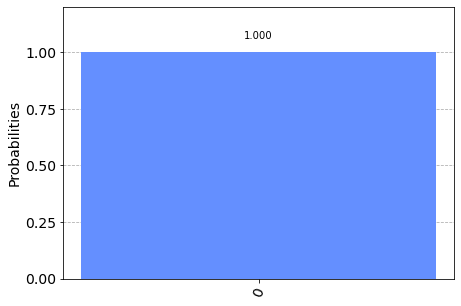

In [ ]:
#Run the simulation
from qiskit.tools.visualization import plot_histogram
 #Execute the circuit (simulation)
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

In [ ]:
#PART TWO: Quantum circuit with H,S,T gates to simulate a Toffoli gate

In [ ]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

# build a circuit
circuit2 = QuantumCircuit(qr,cr)


In [ ]:
circuit2.h(qr[2])

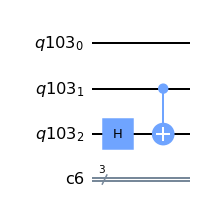

In [ ]:
circuit2.cx(qr[1], qr[2])
circuit2.draw(output="mpl")

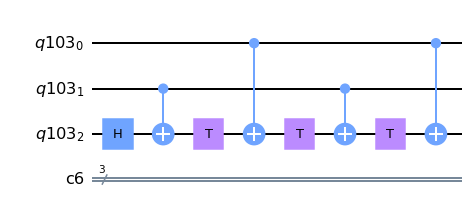

In [ ]:
circuit2.t(qr[2])
circuit2.cx(qr[0], qr[2])
circuit2.t(qr[2])
circuit2.cx(qr[1], qr[2])
circuit2.t(qr[2])
circuit2.cx(qr[0], qr[2])
circuit2.draw(output="mpl")

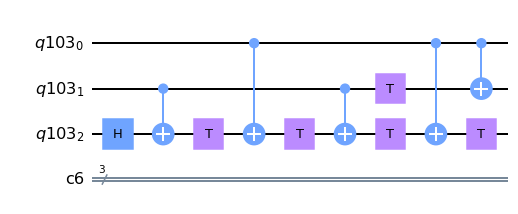

In [ ]:
circuit2.t(qr[2])
circuit2.t(qr[1])
circuit2.cx(qr[0], qr[1])
circuit2.draw(output="mpl")

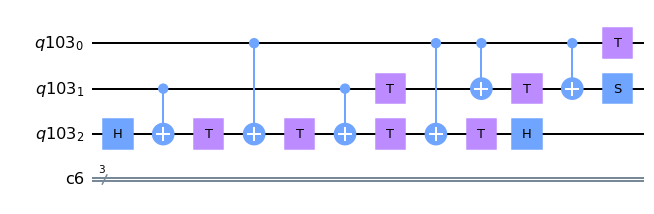

In [ ]:
circuit2.t(qr[1])
circuit2.h(qr[2])
circuit2.cx(qr[0], qr[1])
circuit2.t(qr[0])
circuit2.s(qr[1])
circuit2.draw(output="mpl")

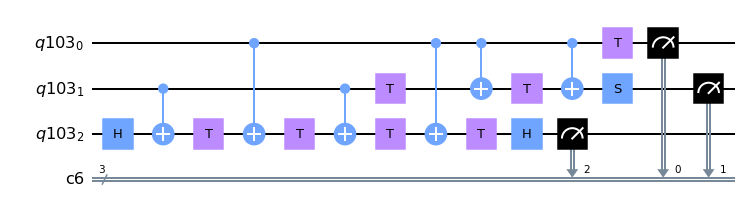

In [ ]:
circuit2.measure(qr,cr)
circuit2.draw(output="mpl")

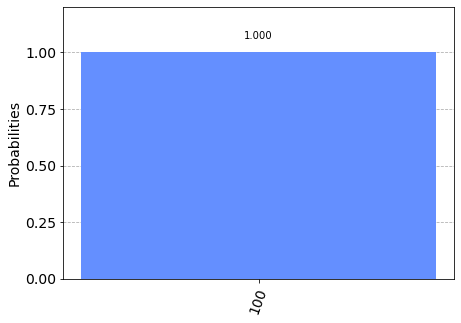

In [ ]:
#Run on classical computer(simulation)
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.visualization import plot_histogram
 #Execute the circuit (simulation)
result = execute(circuit2, backend=simulator).result()
plot_histogram(result.get_counts(circuit2))

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_bogota')
job = execute(circuit2, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()


ibmqfactory.load_account:WARNING:2022-02-20 12:39:54,635: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


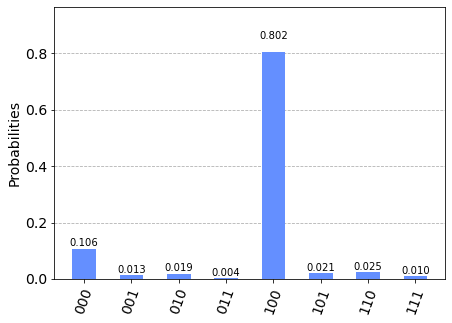

In [ ]:
plot_histogram(result.get_counts())